In [80]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [81]:
trainDataset = pd.read_csv('train.csv')
testDataset = pd.read_csv('test.csv')
combineNDFrame = trainDataset.append(testDataset, sort="False")
combineNDArray = [trainDataset, testDataset]



----------------------------------------------------------------------------------------------------------------

Que 9: - Can youobserve significant correlation (average survivied ratio>0.5) among the group of Pclass=1and Survived? If Pclasshas significant correlation with Survivied, we should include this feature in the predictivemodel.Based on your computation, will you include this feature in the predictive model?

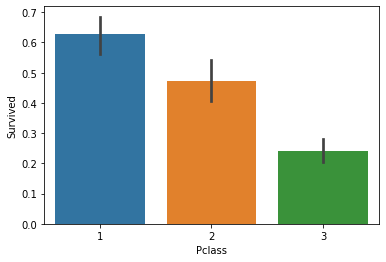

In [82]:
sb.barplot(x='Pclass',y='Survived',data=trainDataset)

In [83]:
trainDataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


----------------------------------------------------------------------------------------------------------------

Que 10: - Are Women (Sex=female) were more likely to have survived?

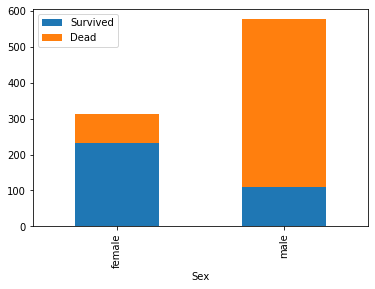

In [84]:
trainDataset['Dead'] = trainDataset['Survived'] == 0
trainDataset.groupby('Sex').agg('sum')[['Survived', 'Dead']].plot(kind='bar', stacked=True)

In [85]:
trainDataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


----------------------------------------------------------------------------------------------------------------

Que 11: - Let us start by understanding correlations between a numeric feature (Age) and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands.This helps us answer questions relating to specific bands (e.g., infants, old). Please plot the histogram plots between ages and Survived.

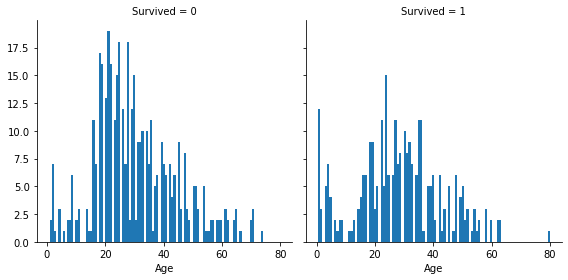

In [86]:
g = sb.FacetGrid(trainDataset,col='Survived', height=4)
g.map(plt.hist,'Age',bins=100)

----------------------------------------------------------------------------------------------------------------

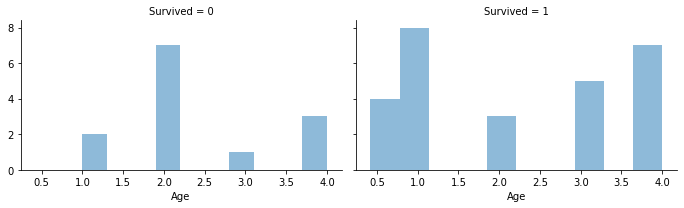

In [87]:
grid = sb.FacetGrid(trainDataset[trainDataset["Age"]<=4], col='Survived', aspect=1.6) 
grid.map(plt.hist, 'Age', alpha=.5, bins=10)

Que 11.1: - Do infants (Age <=4) have high survival rate?

Ans: - Yes, infants (Age<=4) have high survival rate.

----------------------------------------------------------------------------------------------------------------

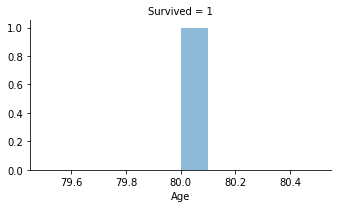

In [88]:
grid = sb.FacetGrid(trainDataset[trainDataset["Age"]==80], col='Survived', aspect=1.6) 
grid.map(plt.hist, 'Age', alpha=.5, bins=10)

Que 11.2: - Do oldest passengers (Age = 80) survive?

Ans: - Yes, oldest passengers (Age=80) survived.

----------------------------------------------------------------------------------------------------------------

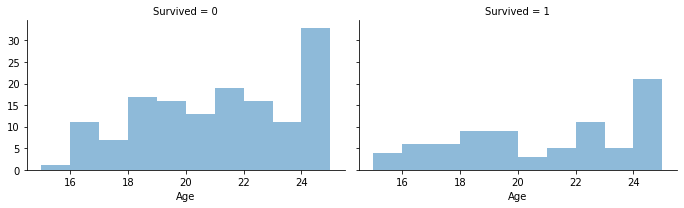

In [89]:
grid = sb.FacetGrid(trainDataset[(trainDataset["Age"]>=15) & (trainDataset["Age"]<=25)],col='Survived', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)

Que 11.3: - Do large number of 15-25 year olds not survive?

Ans: - Yes, As per the histogram large number of 15-25 years olds did not survive.

----------------------------------------------------------------------------------------------------------------

Que 11.4: - Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)

Ans: - As per above observations, we should consider age in our model.

----------------------------------------------------------------------------------------------------------------

Que 11.5: - Should we band age groups?

Ans: - Yes, we should.

----------------------------------------------------------------------------------------------------------------

Que 12: - We can combine three features(age, Pclass, and survivied)for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

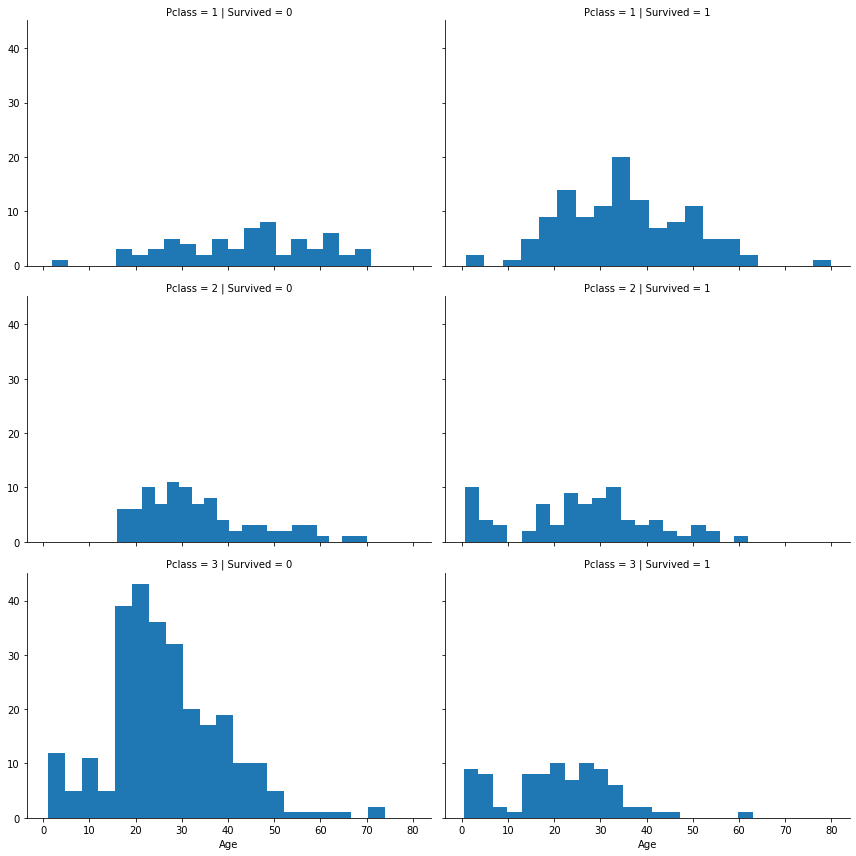

In [90]:
grid = sb.FacetGrid(trainDataset,row='Pclass',col='Survived',aspect=1.5, height=4)
grid.map(plt.hist,'Age',bins=20)

----------------------------------------------------------------------------------------------------------------

Que 12.1: - Does Pclass=3 have most passengers, however most did not survive?

Ans: - Yes, even though Pclass 3 has most passengers most of them were not able to survive.

----------------------------------------------------------------------------------------------------------------

Que 12.2: - Do infant passengers in Pclass=2 and Pclass=3 mostly survive?

Ans: - Yes, with no death of infants in Pclass = 2, and in Pclass = 3 there are few death.

----------------------------------------------------------------------------------------------------------------

Que 12.3: - Do most passengers in Pclass=1 survive?

Ans: - Yes, As per the histogram, most of passengers in Pclass = 1 survived.

----------------------------------------------------------------------------------------------------------------

Que 12.4: - Does Pclass vary in terms of Age distribution of passengers?

Ans: - Yes, it varies along with age distribution.

----------------------------------------------------------------------------------------------------------------

Que 12.5: - Should we consider Pclass for model training?

Ans: - Yes.

----------------------------------------------------------------------------------------------------------------

Que 13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).Please plot a histogram figure to illustrate the correlations of Embarked, Sex, Fare, and Survivied.

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


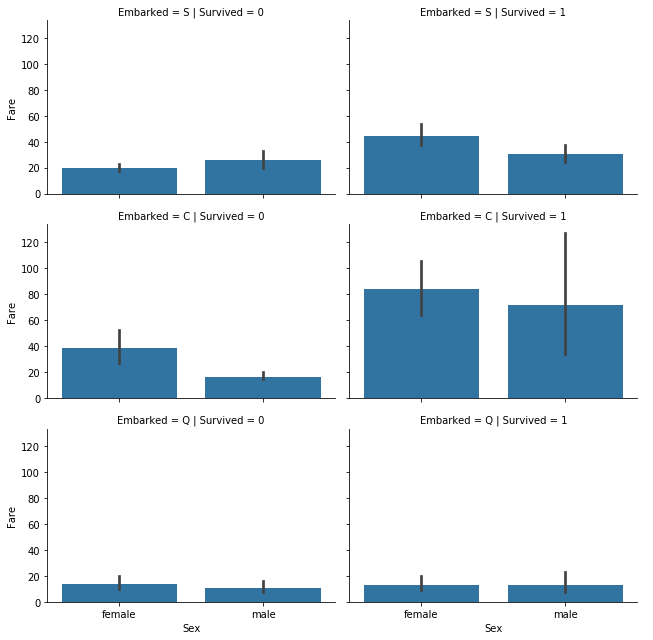

In [91]:
fare = sb.FacetGrid(trainDataset, row='Embarked', col='Survived', height=3, aspect=1.5)
fare.map(sb.barplot, 'Sex', 'Fare')
fare.add_legend()

----------------------------------------------------------------------------------------------------------------

Que 13.1: - Do higher fare paying passengers have better survival?

Ans: - Yes.

----------------------------------------------------------------------------------------------------------------

Que 13.2: - Port of embarkation correlates with survival rates

Ans: - Yes, as per the histogram, Embarked C has high survival rate compared to others; it does correlates with survival rates.

----------------------------------------------------------------------------------------------------------------

Que 13.2: - Should we consider banding fare feature?

Ans: - Yes, we should.

----------------------------------------------------------------------------------------------------------------

Que 14: - What is the rate of duplicates for the Ticket feature? Is there a correlation between Ticket and survival? Should we drop the Ticket feature?

In [92]:
ticketData=trainDataset['Ticket'].describe()

In [93]:
duplicateTicketsRate=((ticketData['count']-ticketData['unique'])/ticketData['count'])*100
format(duplicateTicketsRate, '.2f')

'23.57'

Ans: - Ticket feature has 23.57% redundancy. Also there is no correlation between Ticket and Survival. So we can drop Ticket feature.

----------------------------------------------------------------------------------------------------------------

Que 15: - Is the Cabin feature complete?  How many null values there are in the Cabin features of the combined dataset of training and test dataset? Should we drop the Cabin feature?

In [94]:
combineNDFrame.describe(include=["O"])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


Ans: - As per above chart the Cabin feature incomplete. Out of 1309 rows (combining both train and test dataset) only 295 rows contain Cabin feature. Among those 186 are unique; rest are null values.
The number of null values are: 1309-295=1014. 
Thus We should drop the Cabin feature.

----------------------------------------------------------------------------------------------------------------

Que 16: - We can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,please convert Sex feature to a new feature called Gender where female=1 and male=0.


In [95]:
for data in combineNDArray:
    data['Gender'] = data['Sex'].map({'male' : 0, 'female' : 1}).astype(int)


In [96]:
combineNDArray[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dead,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,0


----------------------------------------------------------------------------------------------------------------

Que 17: - We start estimating and completing features with missing or null values. We will first do this for the Age feature.We can consider three methods to complete a numerical continuous feature.A simple way is to generate random numbers between mean and standard deviation.More accurate way of guessing missing values is touse the K-Nearest Neighbor algorithmto select the top-K most similar data points, and then use the top-K most similar data points to impute the missing values of ages.  

In [97]:
trainDataset['Age'] = trainDataset['Age'].apply(lambda x: np.random.randint(high = 29.699118, low = 14.526497) if np.isnan(x) else x)

imputer = KNNImputer(n_neighbors=2)
dataFill = imputer.fit_transform(trainDataset.loc[:,trainDataset.columns.isin(['Age','Fare','SibSp','Parch','Gender','Survived'])])
dataFill = pd.DataFrame(df_filled , columns =['Survived','Gender','Age','SibSp','Parch','Fare'] )

dataFill['Name'] = trainDataset['Name']
dataFill['Ticket'] = trainDataset['Ticket']
dataFill['Cabin'] = trainDataset['Cabin']
dataFill['Pclass'] = trainDataset['Pclass']
dataFill['PassengerId'] = trainDataset['PassengerId']
dataFill['Embarked'] = trainDataset['Embarked']

dataFill.head()


,Survived,Gender,Age,SibSp,Parch,Fare,Name,Ticket,Cabin,Pclass,PassengerId,Embarked
0,0.0,22.0,1.0,0.0,7.2500,0.0,"Braund, Mr. Owen Harris",A/5 21171,NaN,3,1,S
1,1.0,38.0,1.0,0.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,1,2,C
2,1.0,26.0,0.0,0.0,7.9250,1.0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,3,3,S
3,1.0,35.0,1.0,0.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,1,4,S
4,0.0,35.0,0.0,0.0,8.0500,0.0,"Allen, Mr. William Henry",373450,NaN,3,5,S


----------------------------------------------------------------------------------------------------------------

Que 18: - Completing a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has somemissing values. Please simply fill these with the most common occurrences.


In [98]:

freqPort = trainDataset.Embarked.mode()[0]
for data in combineNDArray:
    data['Embarked'] = data['Embarked'].fillna(freqPort)
    
trainDataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


----------------------------------------------------------------------------------------------------------------

Que 19: - Completing and converting a numeric feature. Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.


In [99]:
testDataset['Fare'].fillna(testDataset['Fare'].mode(), inplace=True)
testDataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


----------------------------------------------------------------------------------------------------------------

Que 20: - Convert the Fare feature to ordinal values based on the Fare Band defined follows:

In [100]:
trainDataset['FareBand'] = pd.qcut(trainDataset['Fare'], 4)
trainDataset[['FareBand', 'Survived']].groupby(['FareBand']).mean()
val = trainDataset.FareBand.unique().get_values()
val.sort()
for df in combineNDArray:
    for i in range(len(val)):
        df.loc[(df['Fare'] > val[i].left) & (df['Fare'] <= val[i].right),'Fare'] = i
    df['Fare'] = df['Fare']

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
combineNDArray[0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dead,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,True,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.0,C85,C,False,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.0,NaN,S,False,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S,False,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.0,NaN,S,True,0,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,14.0,0,0,330877,1.0,NaN,Q,True,0,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.0,E46,S,True,0,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2.0,NaN,S,True,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1.0,NaN,S,False,1,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,2.0,NaN,C,False,1,"(14.454, 31.0]"


Link to the code: - https://colab.research.google.com/drive/1SyPE-OIO8YClI2SZ9mFeKoOMSh1lii_t